In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("/content/drive/MyDrive/udemy_time_series/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/udemy_time_series/test.csv")

In [3]:
train_df

,date_y,y,Appliances_lag96,Appliances_lag97,Appliances_lag95,RH_out_lag35,RH_out_lag11,RH_out_lag12,RH_out_lag36,RH_out_lag34,Appliances_lag120,RH_out_lag155
0,2016-01-21 04:00:00,40.000000,35.000000,45.000000,45.000000,83.833333,77.166667,65.416667,78.083333,81.750000,45.000000,92.000000
1,2016-01-21 05:00:00,51.666667,45.000000,35.000000,40.000000,81.750000,81.333333,77.166667,83.833333,89.083333,41.666667,91.583333
2,2016-01-21 06:00:00,45.000000,40.000000,45.000000,226.666667,89.083333,76.500000,81.333333,81.750000,93.666667,66.666667,89.750000
3,2016-01-21 07:00:00,46.666667,226.666667,40.000000,160.000000,93.666667,75.916667,76.500000,89.083333,96.833333,63.333333,87.583333
4,2016-01-21 08:00:00,31.666667,160.000000,226.666667,168.333333,96.833333,80.833333,75.916667,93.666667,95.916667,208.333333,87.416667
...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2016-04-30 19:00:00,60.000000,116.666667,275.000000,115.000000,83.250000,94.166667,95.583333,88.750000,76.750000,105.000000,75.250000
2416,2016-04-30 20:00:00,71.666667,115.000000,116.666667,78.333333,76.750000,92.166667,94.166667,83.250000,75.208333,105.000000,68.750000
2417,2016-04-30 21:00:00,70.000000,78.333333,115.000000,63.333333,75.208333,86.000000,92.166667,76.750000,75.708333,71.666667,62.833333
2418,2016-04-30 22:00:00,73.333333,63.333333,78.333333,60.000000,75.708333,78.166667,86.000000,75.208333,78.083333,55.000000,57.416667


In [4]:
test_df

,date_y,y,Appliances_lag96,Appliances_lag97,Appliances_lag95,RH_out_lag35,RH_out_lag11,RH_out_lag12,RH_out_lag36,RH_out_lag34,Appliances_lag120,RH_out_lag155
0,2016-05-01 00:00:00,51.666667,55.000000,60.000000,55.000000,80.583333,70.916667,75.333333,78.083333,80.833333,56.666667,42.333333
1,2016-05-01 01:00:00,55.000000,55.000000,55.000000,50.000000,80.833333,67.583333,70.916667,80.583333,78.666667,50.000000,40.000000
2,2016-05-01 02:00:00,48.333333,50.000000,55.000000,55.000000,78.666667,64.916667,67.583333,80.833333,74.416667,56.666667,38.333333
3,2016-05-01 03:00:00,41.666667,55.000000,50.000000,60.000000,74.416667,64.083333,64.916667,78.666667,67.083333,51.666667,36.416667
4,2016-05-01 04:00:00,53.333333,60.000000,55.000000,53.333333,67.083333,65.333333,64.083333,74.416667,57.666667,55.000000,40.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
638,2016-05-27 14:00:00,101.666667,60.000000,61.666667,46.666667,94.416667,86.000000,86.000000,95.166667,95.000000,63.333333,90.250000
639,2016-05-27 15:00:00,76.666667,46.666667,60.000000,48.333333,95.000000,85.166667,86.000000,94.416667,95.000000,81.666667,90.750000
640,2016-05-27 16:00:00,135.000000,48.333333,46.666667,75.000000,95.000000,84.416667,85.166667,95.000000,95.416667,90.000000,88.583333
641,2016-05-27 17:00:00,180.000000,75.000000,48.333333,78.333333,95.416667,84.166667,84.416667,95.000000,96.000000,208.333333,86.333333


In [5]:
y_train = train_df["y"]
X_train = train_df.drop(columns=["y", "date_y"])

y_test = test_df["y"]
X_test = test_df.drop(columns=["y", "date_y"])

In [6]:
X_train

,Appliances_lag96,Appliances_lag97,Appliances_lag95,RH_out_lag35,RH_out_lag11,RH_out_lag12,RH_out_lag36,RH_out_lag34,Appliances_lag120,RH_out_lag155
0,35.000000,45.000000,45.000000,83.833333,77.166667,65.416667,78.083333,81.750000,45.000000,92.000000
1,45.000000,35.000000,40.000000,81.750000,81.333333,77.166667,83.833333,89.083333,41.666667,91.583333
2,40.000000,45.000000,226.666667,89.083333,76.500000,81.333333,81.750000,93.666667,66.666667,89.750000
3,226.666667,40.000000,160.000000,93.666667,75.916667,76.500000,89.083333,96.833333,63.333333,87.583333
4,160.000000,226.666667,168.333333,96.833333,80.833333,75.916667,93.666667,95.916667,208.333333,87.416667
...,...,...,...,...,...,...,...,...,...,...
2415,116.666667,275.000000,115.000000,83.250000,94.166667,95.583333,88.750000,76.750000,105.000000,75.250000
2416,115.000000,116.666667,78.333333,76.750000,92.166667,94.166667,83.250000,75.208333,105.000000,68.750000
2417,78.333333,115.000000,63.333333,75.208333,86.000000,92.166667,76.750000,75.708333,71.666667,62.833333
2418,63.333333,78.333333,60.000000,75.708333,78.166667,86.000000,75.208333,78.083333,55.000000,57.416667


In [7]:
y_train

0       40.000000
1       51.666667
2       45.000000
3       46.666667
4       31.666667
          ...    
2415    60.000000
2416    71.666667
2417    70.000000
2418    73.333333
2419    41.666667
Name: y, Length: 2420, dtype: float64

In [8]:
X_test

,Appliances_lag96,Appliances_lag97,Appliances_lag95,RH_out_lag35,RH_out_lag11,RH_out_lag12,RH_out_lag36,RH_out_lag34,Appliances_lag120,RH_out_lag155
0,55.000000,60.000000,55.000000,80.583333,70.916667,75.333333,78.083333,80.833333,56.666667,42.333333
1,55.000000,55.000000,50.000000,80.833333,67.583333,70.916667,80.583333,78.666667,50.000000,40.000000
2,50.000000,55.000000,55.000000,78.666667,64.916667,67.583333,80.833333,74.416667,56.666667,38.333333
3,55.000000,50.000000,60.000000,74.416667,64.083333,64.916667,78.666667,67.083333,51.666667,36.416667
4,60.000000,55.000000,53.333333,67.083333,65.333333,64.083333,74.416667,57.666667,55.000000,40.333333
...,...,...,...,...,...,...,...,...,...,...
638,60.000000,61.666667,46.666667,94.416667,86.000000,86.000000,95.166667,95.000000,63.333333,90.250000
639,46.666667,60.000000,48.333333,95.000000,85.166667,86.000000,94.416667,95.000000,81.666667,90.750000
640,48.333333,46.666667,75.000000,95.000000,84.416667,85.166667,95.000000,95.416667,90.000000,88.583333
641,75.000000,48.333333,78.333333,95.416667,84.166667,84.416667,95.000000,96.000000,208.333333,86.333333


In [9]:
y_test

0       51.666667
1       55.000000
2       48.333333
3       41.666667
4       53.333333
          ...    
638    101.666667
639     76.666667
640    135.000000
641    180.000000
642    430.000000
Name: y, Length: 643, dtype: float64

## ランダムフォレスト

In [10]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
rf_pred = rf.predict(X_test)
result_df = pd.DataFrame(data=pd.concat([y_test, pd.Series(rf_pred)], axis=1))
result_df

,y,0
0,51.666667,51.850000
1,55.000000,52.200000
2,48.333333,52.633333
3,41.666667,62.500000
4,53.333333,53.283333
...,...,...
638,101.666667,79.450000
639,76.666667,148.266667
640,135.000000,162.650000
641,180.000000,127.350000


In [12]:
result_df.columns = ["y", "pred"]

<Axes: >

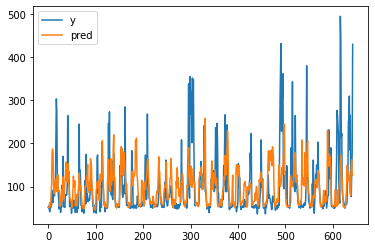

In [13]:
result_df.plot()

In [14]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(result_df["y"], result_df["pred"]))
print("RMSE:{:.2f}".format(rmse))

RMSE:64.66


## LightGBM
- train APIで実行する方法とsklearn APIで実行する方法があるが、今回はtrain APIを使う

In [15]:
import lightgbm as lgb

In [29]:
y_train = train_df["y"]
X_train = train_df.drop(columns=["y", "date_y"])

y_test = test_df["y"]
X_test = test_df.drop(columns=["y", "date_y"])

In [30]:
X_train

,Appliances_lag96,Appliances_lag97,Appliances_lag95,RH_out_lag35,RH_out_lag11,RH_out_lag12,RH_out_lag36,RH_out_lag34,Appliances_lag120,RH_out_lag155
0,35.000000,45.000000,45.000000,83.833333,77.166667,65.416667,78.083333,81.750000,45.000000,92.000000
1,45.000000,35.000000,40.000000,81.750000,81.333333,77.166667,83.833333,89.083333,41.666667,91.583333
2,40.000000,45.000000,226.666667,89.083333,76.500000,81.333333,81.750000,93.666667,66.666667,89.750000
3,226.666667,40.000000,160.000000,93.666667,75.916667,76.500000,89.083333,96.833333,63.333333,87.583333
4,160.000000,226.666667,168.333333,96.833333,80.833333,75.916667,93.666667,95.916667,208.333333,87.416667
...,...,...,...,...,...,...,...,...,...,...
2415,116.666667,275.000000,115.000000,83.250000,94.166667,95.583333,88.750000,76.750000,105.000000,75.250000
2416,115.000000,116.666667,78.333333,76.750000,92.166667,94.166667,83.250000,75.208333,105.000000,68.750000
2417,78.333333,115.000000,63.333333,75.208333,86.000000,92.166667,76.750000,75.708333,71.666667,62.833333
2418,63.333333,78.333333,60.000000,75.708333,78.166667,86.000000,75.208333,78.083333,55.000000,57.416667


In [31]:
X_val = X_train.iloc[2000:, :]
X_train = X_train.iloc[0:2000, :]

y_val = y_train.reset_index().iloc[2000:, 1]
y_train = y_train.reset_index().iloc[0:2000, 1]

In [35]:
X_train

,Appliances_lag96,Appliances_lag97,Appliances_lag95,RH_out_lag35,RH_out_lag11,RH_out_lag12,RH_out_lag36,RH_out_lag34,Appliances_lag120,RH_out_lag155
0,35.000000,45.000000,45.000000,83.833333,77.166667,65.416667,78.083333,81.750000,45.000000,92.000000
1,45.000000,35.000000,40.000000,81.750000,81.333333,77.166667,83.833333,89.083333,41.666667,91.583333
2,40.000000,45.000000,226.666667,89.083333,76.500000,81.333333,81.750000,93.666667,66.666667,89.750000
3,226.666667,40.000000,160.000000,93.666667,75.916667,76.500000,89.083333,96.833333,63.333333,87.583333
4,160.000000,226.666667,168.333333,96.833333,80.833333,75.916667,93.666667,95.916667,208.333333,87.416667
...,...,...,...,...,...,...,...,...,...,...
1995,75.000000,61.666667,126.666667,80.250000,68.000000,53.333333,77.250000,82.833333,190.000000,66.916667
1996,126.666667,75.000000,73.333333,82.833333,86.166667,68.000000,80.250000,83.166667,328.333333,71.416667
1997,73.333333,126.666667,83.333333,83.166667,92.000000,86.166667,82.833333,83.666667,85.000000,73.250000
1998,83.333333,73.333333,68.333333,83.666667,92.416667,92.000000,83.166667,85.166667,78.333333,75.416667


In [36]:
lgb_train = lgb.Dataset(data=X_train, label=y_train)
lgb_val = lgb.Dataset(data=X_val, label=y_val)

In [37]:
params = {"objective":"regression", "metrics":"rmse"}

In [38]:
lgb_model = lgb.train(params, train_set = lgb_train, valid_sets = [lgb_val])

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2112
[LightGBM] [Info] Number of data points in the train set: 2000, number of used features: 10
[LightGBM] [Info] Start training from score 96.671667
[1]	valid_0's rmse: 77.8025
[2]	valid_0's rmse: 76.4131
[3]	valid_0's rmse: 75.1524
[4]	valid_0's rmse: 74.3294
[5]	valid_0's rmse: 73.5949
[6]	valid_0's rmse: 73.3178
[7]	valid_0's rmse: 72.8983
[8]	valid_0's rmse: 72.6663
[9]	valid_0's rmse: 72.3946
[10]	valid_0's rmse: 71.9919
[11]	valid_0's rmse: 71.9534
[12]	valid_0's rmse: 71.4867
[13]	valid_0's rmse: 71.4269
[14]	valid_0's rmse: 71.2305
[15]	valid_0's rmse: 70.8845
[16]	valid_0's rmse: 70.6978
[17]	valid_0's rmse: 70.5597
[18]	valid_0's rmse: 70.6399
[19]	valid_0's rmse: 70.7531
[20]	valid_0's rmse: 70.8629
[21]	valid_0's rmse: 70.8844
[22]	valid_0's rmse: 71.034
[23]	valid_0's rmse: 70.979

In [39]:
lgb_pred = lgb_model.predict(X_test)

In [40]:
result_df = pd.DataFrame(data=pd.concat([y_test, pd.Series(lgb_pred)], axis=1))
result_df

,y,0
0,51.666667,59.297378
1,55.000000,52.170496
2,48.333333,53.858883
3,41.666667,49.484376
4,53.333333,50.086711
...,...,...
638,101.666667,124.643821
639,76.666667,205.737130
640,135.000000,188.161504
641,180.000000,176.569557


In [41]:
result_df.columns = ["y", "pred"]

<Axes: >

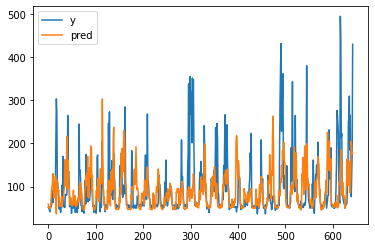

In [42]:
result_df.plot()

In [43]:
rmse = np.sqrt(mean_squared_error(result_df["y"], result_df["pred"]))
print("RMSE:{:.2f}".format(rmse))

RMSE:66.52
